Bienvenidos al taller 6 del curso Astronomía en la Era de la Información.

Hoy aprenderemos otra herramienta imprescindible a la hora de programar: **control de flujo/condicionalidad**. Esto nos permite controlar lo que queremos qué haga el código asumiendo que tenemos algunos datos con los que queremos trabajar y otros no.

Como utilizaremos ciclos, vistos en la clase pasada, partiremos con un ejemplo de estos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
arreglo = np.arange(1.1,20,0.5)
for elemento in arreglo:
    print "elemento es ",elemento
    print "elemento al cuadrado es ",elemento**2

elemento es  1.1
elemento al cuadrado es  1.21
elemento es  1.6
elemento al cuadrado es  2.56
elemento es  2.1
elemento al cuadrado es  4.41
elemento es  2.6
elemento al cuadrado es  6.76
elemento es  3.1
elemento al cuadrado es  9.61
elemento es  3.6
elemento al cuadrado es  12.96
elemento es  4.1
elemento al cuadrado es  16.81
elemento es  4.6
elemento al cuadrado es  21.16
elemento es  5.1
elemento al cuadrado es  26.01
elemento es  5.6
elemento al cuadrado es  31.36
elemento es  6.1
elemento al cuadrado es  37.21
elemento es  6.6
elemento al cuadrado es  43.56
elemento es  7.1
elemento al cuadrado es  50.41
elemento es  7.6
elemento al cuadrado es  57.76
elemento es  8.1
elemento al cuadrado es  65.61
elemento es  8.6
elemento al cuadrado es  73.96
elemento es  9.1
elemento al cuadrado es  82.81
elemento es  9.6
elemento al cuadrado es  92.16
elemento es  10.1
elemento al cuadrado es  102.01
elemento es  10.6
elemento al cuadrado es  112.36
elemento es  11.1
elemento al cuadrado es

Para entender cómo funciona la condicionalidad, generamos otro arreglo con números del 0 al 99 y agregamos dentro del ciclo _for_ una condición que hace que se impriman sólo los pares.

In [3]:
arreglo=np.arange(100)
for numero in arreglo:
    if numero%2 == 0: # ojo con qué hace %!! el resultado es el "resto" de la división
        print numero

0
2
4
6
8
10
12
14
16
18
20
22
24
26
28
30
32
34
36
38
40
42
44
46
48
50
52
54
56
58
60
62
64
66
68
70
72
74
76
78
80
82
84
86
88
90
92
94
96
98


¿Cómo funciona el _if_? Simplemente es _si se cumple la condición, se hace lo de dentro del ciclo_. Pruebe cambiando el código para que imprima sólo los números divisibles por 7. Importante: recuerde qué significa _if_ en inglés. Si no sabe, ¡busque o pregúntele a un compañero! Así es mucho más fácil entender. Note también que se define similarmente a un *for*: con dos puntos y sangría.

Una condición puede ser compuesta por dos o más condiciones. En el siguiente código se muestra cómo imprimir los números divisibles por 2 **y** por 7, y luego los divisibles por 2 **o** por 7. Nuevamente usamos palabras en inglés.

In [4]:
print "Divisibles por 2 y por 7"
for numero in arreglo:
    if numero%2 == 0 and numero%7 == 0: 
        print numero
print "Divisibles por 2 o por 7"
for numero in arreglo:
    if numero%2 == 0 or numero%7 == 0: 
        print numero

Divisibles por 2 y por 7
0
14
28
42
56
70
84
98
Divisibles por 2 o por 7
0
2
4
6
7
8
10
12
14
16
18
20
21
22
24
26
28
30
32
34
35
36
38
40
42
44
46
48
49
50
52
54
56
58
60
62
63
64
66
68
70
72
74
76
77
78
80
82
84
86
88
90
91
92
94
96
98


## Ejercicio 1
Genere un arreglo de 1000 números, y muestre sólo los números divisibles por 3, 5, y 7.

In [5]:
arreglo = range(1000)
for numero in arreglo:
    if numero%3 == 0 and numero%5 == 0 and numero%7==0:
        print numero

0
105
210
315
420
525
630
735
840
945


Los condicionales también los puede definir como que **no** se cumpla cierta condición. Acá un ejemplo, que imprime los números pares **no** divisibles por 7.

In [6]:
arreglo = np.arange(100)
for numero in arreglo:
    if numero%2 == 0 and not numero%7 == 0:
        print numero

2
4
6
8
10
12
16
18
20
22
24
26
30
32
34
36
38
40
44
46
48
50
52
54
58
60
62
64
66
68
72
74
76
78
80
82
86
88
90
92
94
96


La condicionalidad también puede usar mayor, menor, mayor igual, y menor igual

In [7]:
arreglo = np.arange(100)
for numero in arreglo:
    if numero%13 == 0 and numero <= 70:
        print numero

0
13
26
39
52
65


## Ejercicio 2
Genere un arreglo de 1000 números, y muestre sólo los números divisibles por 4, 5, pero no por 6.

In [8]:
arreglo = range(1000)
for numero in arreglo:
    if numero%4==0 and numero%5==0 and numero%6!=0:
        print numero

20
40
80
100
140
160
200
220
260
280
320
340
380
400
440
460
500
520
560
580
620
640
680
700
740
760
800
820
860
880
920
940
980


A continuación, trabajaremos con datos astronómicos reales, del grupo local de galaxias. Partiremos cargándolo, como es usual, con *pandas*. Las columnas del catálogo son:
* Nombre: nombre de la galaxia
* l, b: coordenadas en el cielo de las galaxias
* dist, derr: distancia a la galaxia y error de medición de esta, en miles de años luz
* diam: diámetro de la galaxia, en miles de años luz
* tipo: tipo morfológico de la galaxia. Acá sólo hacemos diferencia entre galaxia gigante ("Gig") o satélite ("Sat")
* desc: año de descubrimiento de la galaxia. Un valor cero indica que se conoce desde la prehistoria o que no se tiene seguridad del año

Usaremos algunas de estas columnas en lo que sigue.

In [9]:
cat_url='https://github.com/rpmunoz/PentaUC/raw/e67af6ea859b99f371b63eebc231f677c7dd91fb/Astronomia%20era%20informacion/data/localgroup.csv'
grupolocal=pd.read_csv(cat_url,header=0,sep=',')
grupolocal.head()

,nombre,l,b,dist,derr,diam,tipo,desc
0,Milky Way,0.0,0.0,0,0,90,Gig,0
1,Sagittarius Dwarf,5.6,-14.1,78,7,20,Sat,1994
2,Ursa Major II,152.5,37.4,100,15,1,Sat,2006
3,Coma Berenices Dwarf,241.9,83.6,144,13,1,Sat,2006
4,Large Magellanic Cloud,280.5,-32.9,165,5,25,Sat,0


El siguiente es un código que recorre toda la tabla, y, si la galaxia es de tipo "Sat", imprime el nombre. Para recorrer la tabla, se debe hacer fila por fila, lo que logramos con las funciones *range* y *len* que hemos aprendido a usar (no podemos hacer *for elemento in tabla* con las tablas de *pandas*). Note también que para acceder al elemento de la posición *i*, es necesario usar *grupolocal.iloc[i]* (como en el taller evaluado, cuando tuvo que definir los catálogos de galaxias elípticas y espirales), y al elegir una fila, el atributo de esa fila (en este caso, el tipo y el nombre) se debe indicar dentro de corchetes y comillas (simples o dobles, a Python no le importa)

In [10]:
for i in range(len(grupolocal)): 
    if grupolocal.iloc[i]['tipo'] == "Sat":
        print grupolocal.iloc[i]['nombre']

Sagittarius Dwarf
Ursa Major II
Coma Berenices Dwarf
Large Magellanic Cloud
Small Magellanic Cloud
Bootes Dwarf
Ursa Minor Dwarf
Sculptor Dwarf
Draco Dwarf
Sextans Dwarf
Ursa Major I
Carina Dwarf
Fornax Dwarf
Hercules Dwarf
Canes Venatici II
Leo IV
Leo II
Canes Venatici I
Leo I
Leo T
Phoenix Dwarf
NGC 6822
NGC 185
Andromeda II
Leo A
IC 1613
Andromeda X
NGC 147
Andromeda III
Andromeda VII
Cetus Dwarf
Andromeda IX
Andromeda I
LGS 3
Andromeda V
Andromeda XI
Andromeda XII
Andromeda XIII
Andromeda VI
M32
M110
IC 10
Tucana Dwarf
Pegasus Dwarf
WLM
Aquarius Dwarf
SagDIG
Antlia Dwarf
NGC 3109
Sextans A
Sextans B


# Ejercicio 3
Modifique el código de abajo para que muestre el nombre y el tamaño de todas las **galaxias satélites** que estén a **más de 2 millones** de años luz

In [12]:
for i in range(len(grupolocal)):
    if grupolocal.iloc[i]['tipo'] == "Sat" and grupolocal.iloc[i]['dist']>2000:
        print grupolocal.iloc[i]['nombre']

NGC 185
Andromeda II
Leo A
IC 1613
Andromeda X
NGC 147
Andromeda III
Andromeda VII
Cetus Dwarf
Andromeda IX
Andromeda I
LGS 3
Andromeda V
Andromeda XI
Andromeda XII
Andromeda XIII
Andromeda VI
M32
M110
IC 10
Tucana Dwarf
Pegasus Dwarf
WLM
Aquarius Dwarf
SagDIG
Antlia Dwarf
NGC 3109
Sextans A
Sextans B


Vamos ahora a graficar las galaxias con sus coordenadas en el cielo (si va muy rápido, al final podemos repetir este proceso con la proyección Mollweide). Para eso usaremos la función *scatter* de *matplotlib*, y le agregaremos en el eje de color la distancia a la que está la galaxia.

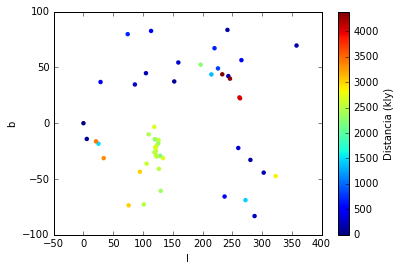

In [13]:
plt.scatter(grupolocal['l'],grupolocal['b'],c=grupolocal['dist'],cmap='jet',edgecolors='none')
cbar=plt.colorbar(label='Distancia (kly)')
plt.xlabel('l')
plt.ylabel('b')

Piense un momento en las estructuras que se forman en este gráfico y el color asociado a estas. ¿Algo le llama la atención? En el siguiente ejercicio estudiaremos cuál es el motivo por el que las observamos.

# Ejercicio 4
El siguiente código debería graficar, una por una, todas las galaxias en un gráfico similar al de arriba, sin colores, con la diferencia de que si es una galaxia gigante, la marca con una estrella negra e imprime su nombre. El gráfico debería verse así:
![PlotT6](https://github.com/rpmunoz/PentaUC/raw/master/Astronomia%20era%20informacion/data/plotT6.png)
Lamentablemente, el código pasó por etapas muy agitadas de su vida y se le anduvieron cruzando las instrucciones, por lo que es su deber arreglarlo, cambiando pocos elementos del código que se presenta abajo. Esto le entregará respuestas a las interrogantes originadas en lo de más arriba.

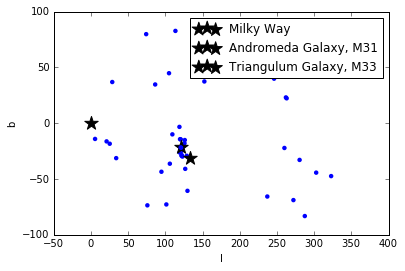

In [15]:
# mutatis mutandis
for i in range(len(grupolocal)):
    if grupolocal.iloc[i]['tipo'] == "Sat":
        plt.scatter(grupolocal.iloc[i]['l'],grupolocal.iloc[i]['b'],edgecolors='none')
    if grupolocal.iloc[i]['tipo'] != "Sat" :
        plt.scatter(grupolocal.iloc[i]['l'],grupolocal.iloc[i]['b'],c='black',marker='*',s=200, label=grupolocal.iloc[i]['nombre'])
plt.xlabel('l')
plt.ylabel('b')
plt.legend(loc='best')

# Ejercicio propuesto
Repetir los últimos gráficos con la proyección Mollweide que se ha visto en talleres anteriores.